In [5]:
#importing necessary libraries required 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default="plotly_white"

# OBJECTIVE

In [ ]:
#ANALYSIS WHICH PRODUCT HAS MAXIMUM SALE BY THIER TYPE AND REVENUE THEY GENERATE.
#NUMBER OF PRODUCTS SOLD VIA CATEGORY.
#REVENUE GENERATED BY SHIPPING CARRIER.
#REVENUE GENERATED VIA SKU
#LOST ON TRANSPORTATION MOLE
#AVERAGE DEFECT RATES.

# E-commerce Supply Chain Analysis

In [6]:
#loading the datset from  csv
df=pd.read_csv(r"C:\Users\HP\Downloads\python day 29 supply_chain_data.csv")

In [7]:
df # displaying the dataset

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [32]:
#GETTING BASIC INFPO OF OUR DATASET CHECKING FOR DATATYPE NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [34]:
df.isnull().sum() # checking for null values

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [9]:
df.describe() 

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


# ANALYSING WHICH PRODUCT HAS MAXIMUM SALES BY THEIR TYPE and the revenue they generate


In [37]:
#checking the type of products
df["Product type"].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [12]:
#displaying products and their counts
df["Product type"].value_counts()

Product type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

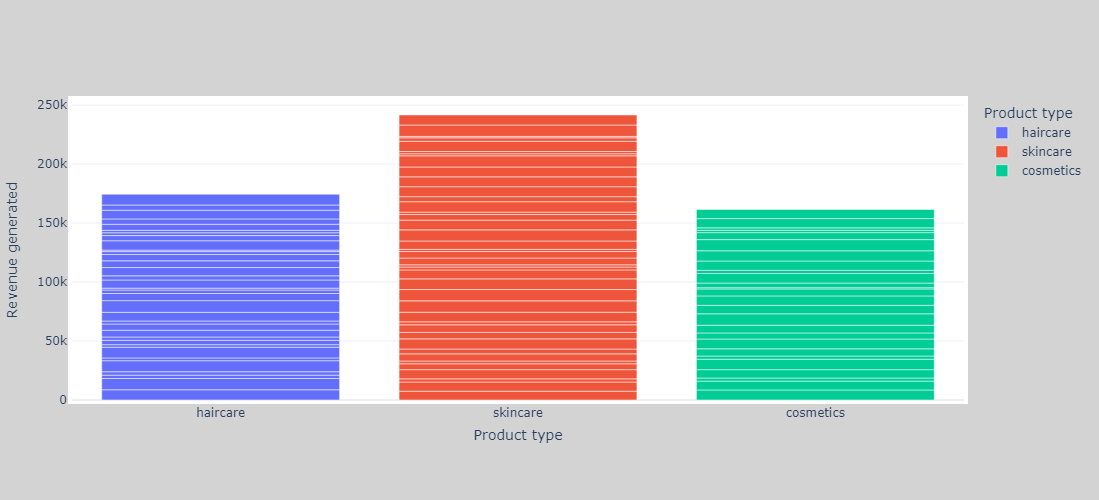

In [194]:
#plotting the bar graph for products and their revenue generated
fig=px.bar(df,x="Product type",y="Revenue generated",
           color="Product type"
           ,hover_data=["Number of products sold"])
# adding background color and specifying height nd width
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)
fig.show()


# calculating the sales Price of product via category

In [51]:

pr=df.groupby("Product type")["Price"].sum()
pr


Product type
cosmetics    1491.387498
haircare     1564.485482
skincare     1890.373155
Name: Price, dtype: float64

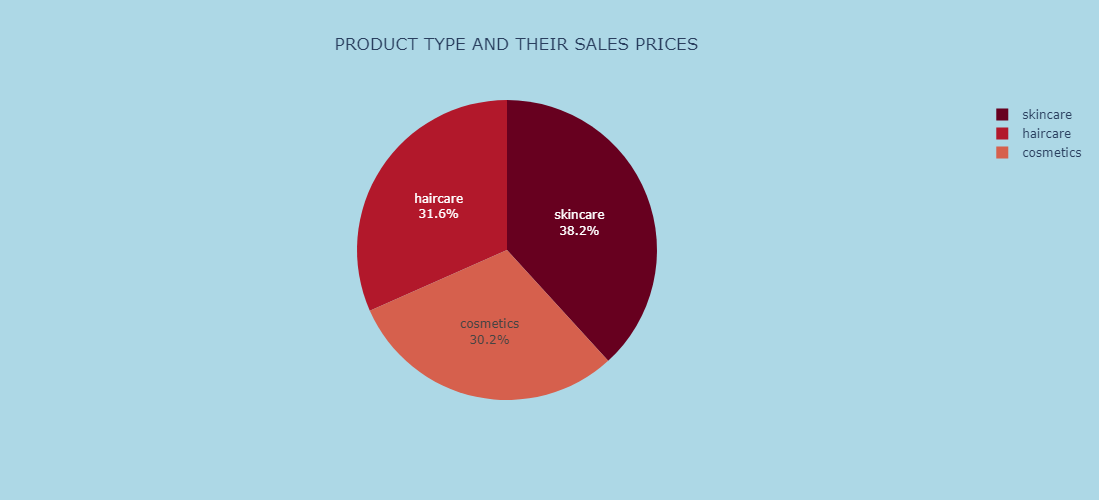

In [160]:
#calculating the sales price via category
#plotting the graph to show the total sale price via category
x=pr.values
y=pr.index
fig = px.pie(pr, values=x, names=y, color_discrete_sequence=px.colors.sequential.RdBu,title="PRODUCT TYPE AND THEIR SALES PRICES ")
# updating the title
fig.update_layout(title_x=0.47)
#updating the background size and colour of pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')
# adding background color and specifying height nd width
fig.update_layout( 
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightblue",
)
fig.show()

# CALCULATING THE NUMBER OF PRODUCTS SOLD VIA CATEGORY

In [100]:
pie=df.groupby("Product type")["Number of products sold"].sum().sort_values(ascending=True)

In [102]:
pie

Product type
cosmetics    11757
haircare     13611
skincare     20731
Name: Number of products sold, dtype: int64

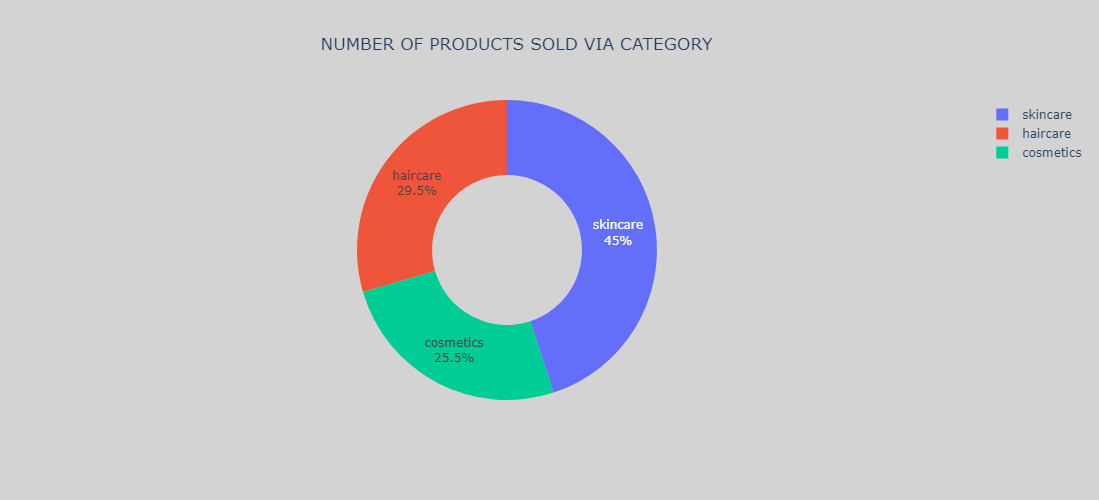

In [192]:
#plotting the graph to show the number of products sold via category
x=pie.values # assigning values
y=pie.index
fig = px.pie(pie, values=x, names=y,
             color_discrete_map={'Thur':'lightcyan',
                                 'Fri':'cyan',
                                 'Sat':'royalblue',
                                 'Sun':'darkblue'}, 
hole=0.5,
             hover_data="Number of products sold"
            ,title="NUMBER OF PRODUCTS SOLD VIA CATEGORY ")
fig.update_traces(textposition='inside', textinfo='percent+label')# specifying the the text position and info
# adding the title 
fig.update_layout(title_x=0.47)
#increasing the size of chart and adding background
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)

fig.show()# to display the figure


#REVENUE GENERATED VIA  SHIPPING CARRIERS



In [75]:
df.head(3) 


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282


In [74]:
df.columns # checking for columns 

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [19]:
# grouping shipping carriers via revenue generated
ship=df.groupby("Shipping carriers")["Revenue generated"].sum().sort_values(ascending=True)
ship

Shipping carriers
Carrier A    142629.994607
Carrier C    184880.177143
Carrier B    250094.646988
Name: Revenue generated, dtype: float64

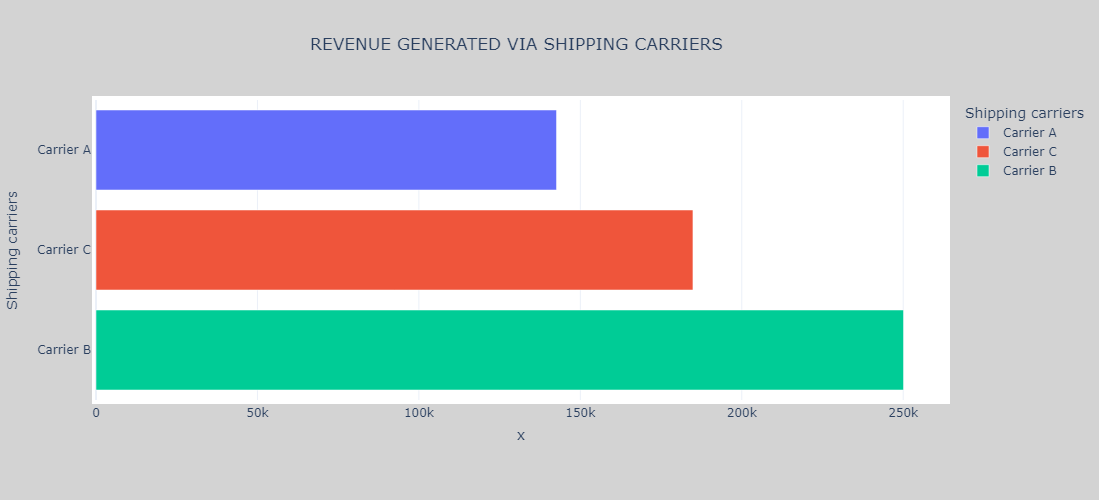

In [198]:
x=ship.values#assigning values
y=ship.index
#plotting horizontal bar graph
fig = px.bar(ship, x=x, y=y,
             title="REVENUE GENERATED VIA SHIPPING CARRIERS"
             ,color=ship.index)
#updating the layout title position to center
fig.update_layout(title_x=0.47)
# adding background color and specifying height nd width
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)
fig.show()

#CALCULATING THE REVENUE GENERATED VIA SKU

In [21]:
df.head(2)# displaying first two rows of the data 

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579


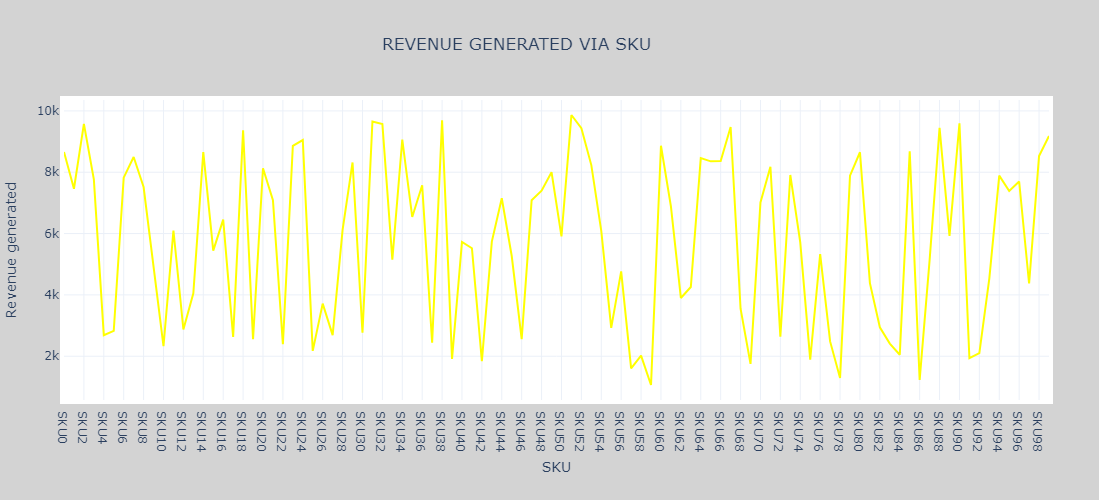

In [167]:
#plotting figure to visualize  the revenue generated via sku type
fig = px.line(df, x="SKU", y="Revenue generated"
              , title='REVENUE GENERATED VIA SKU')
fig.update_layout(title_x=0.47)         # setting the title to center
fig.update_traces(line_color='YELLOW') #updating the line colour
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)

fig.show()

# ORDER QUANTITIES VIA SKU

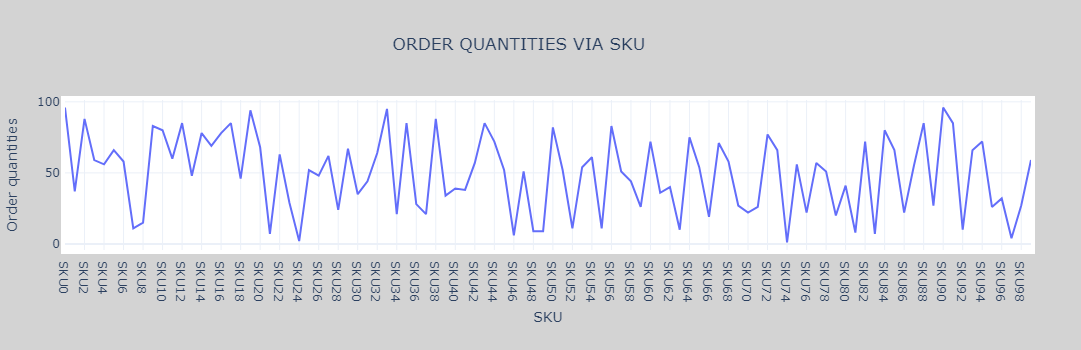

In [173]:
# visualizing the order quantities via sku on line graph
fig = px.line(df, x="SKU", y="Order quantities", 
              
              title='ORDER QUANTITIES VIA SKU')
fig.update_layout(title_x=0.48) # setting the title to centerf
fig.update_layout(
    autosize=False,
    width=1000,
    height=350,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)
fig.show()


#FINDING THE SHIPPING COSTS VIA CAREER

In [24]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

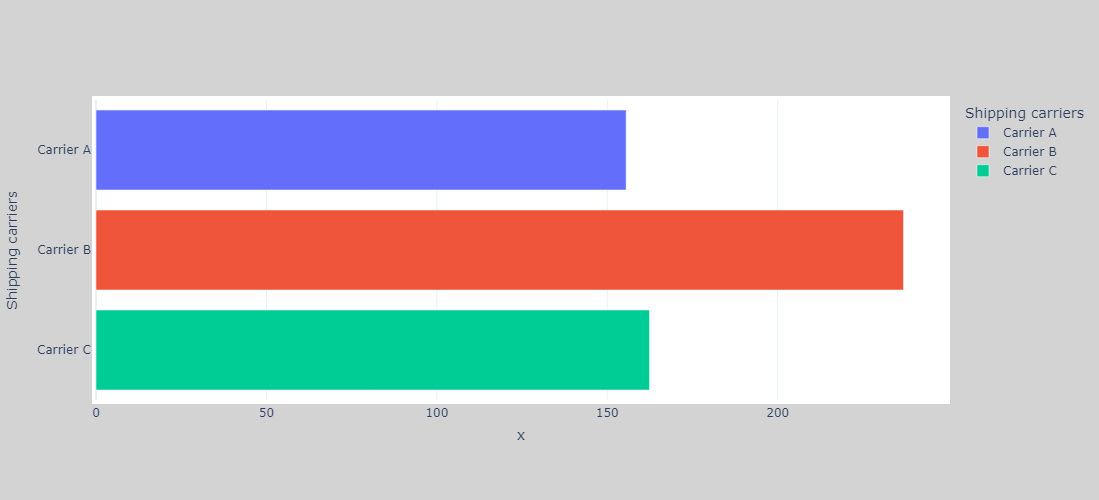

In [187]:
# grouping the shipping costs via career and assigning it to a variable
carrr=df.groupby("Shipping carriers")["Shipping costs"].sum()
carrr
fig = px.bar(carrr, y=carrr.index,
             x=carrr.values,
             color=carrr.index)
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)
fig.show()

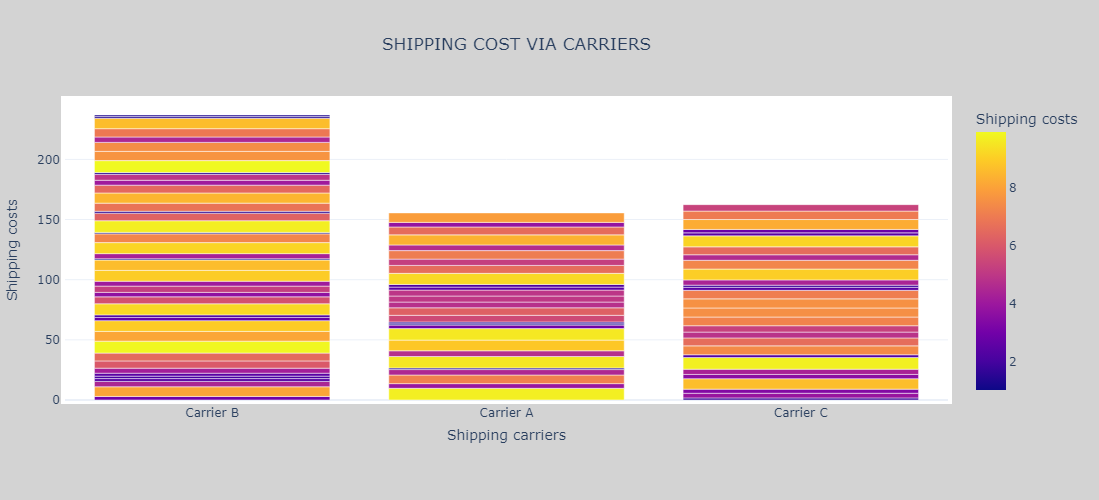

In [191]:
#plotting the bar graph for representation
fig = px.bar(df, x="Shipping carriers", 
             y="Shipping costs",
             color="Shipping costs")
# setting the title and  displaying it on centre
fig.update_layout(title_text="SHIPPING COST VIA CARRIERS"
                  , title_x=0.47)
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)
fig.show()  # display the figure

In [27]:
df.columns # displaying the columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

# HERE WE WILL CALCULATE THE COSTS VIA TRANSPORTATION MODE

In [28]:

#grouping the costs via transport mode 
df2=df.groupby("Transportation modes")['Costs'].sum()
df2 # displaying the counts via transport mode

Transportation modes
Air     14604.527498
Rail    15168.931559
Road    16048.193639
Sea      7102.925520
Name: Costs, dtype: float64

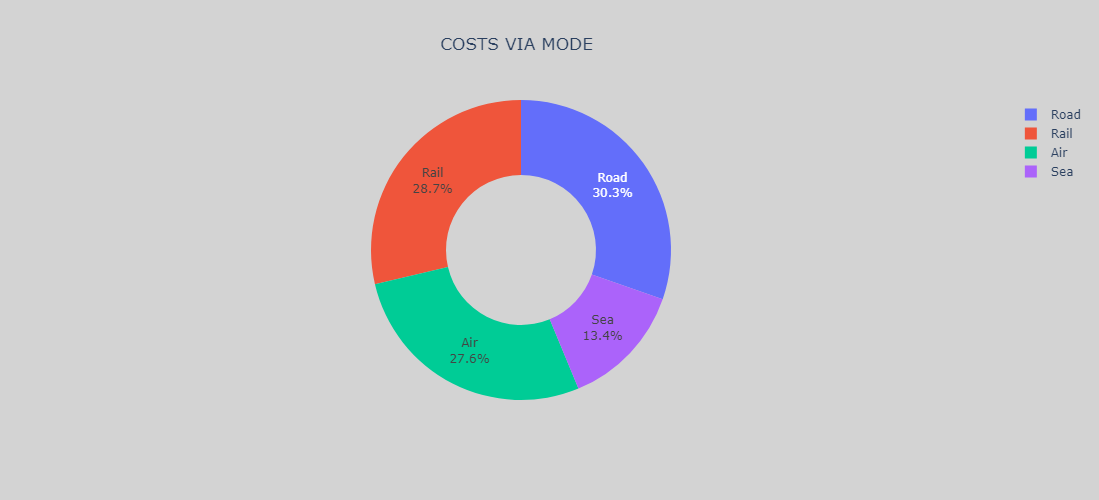

In [182]:
x=df2.index
y=df2.values  # assigning the values to variables 
fig = px.pie(df2, values=y, names=x,
             hole=0.5,             #assigning the hole for making it a doughnut chart
             title="COSTS VIA MODE")      # assigning the title
# updating the layout and brining the title to center
fig.update_layout(title_x=0.47)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="lightgrey",
)
fig.show() # display the figure


# NOW WE WILL CALCULATE AVERAGE DEFECT RATES IN PRODUCTS 

In [30]:
df.columns # displaying the columns


Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

# CONCLUSION


In [ ]:
#FROM ABOVE DATA ANALYSIS AND VISUALIZATION TECHNIQUE WE WERE ABLE TO GATHER THAT THE MAXIMUM DEFECT RATES ARE IN HAIRCARE PRDUCTS
#ROADWAYS ACCOUNT FOR MAJOR CAST VIA TRANPORTATION 
#ORDER AND REVENUE GENERATED VIA SKU.
#PRODUCTS SOLD VIA CATEGORY.
#HAIRCARE PRDUCTS ACCOUNTS FOR MAXIMUM REVENUE GENERATION.